### Import Required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset into dataframe.

In [15]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('HousingData.csv')
df.shape

(506, 14)

In [16]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Data Visualization

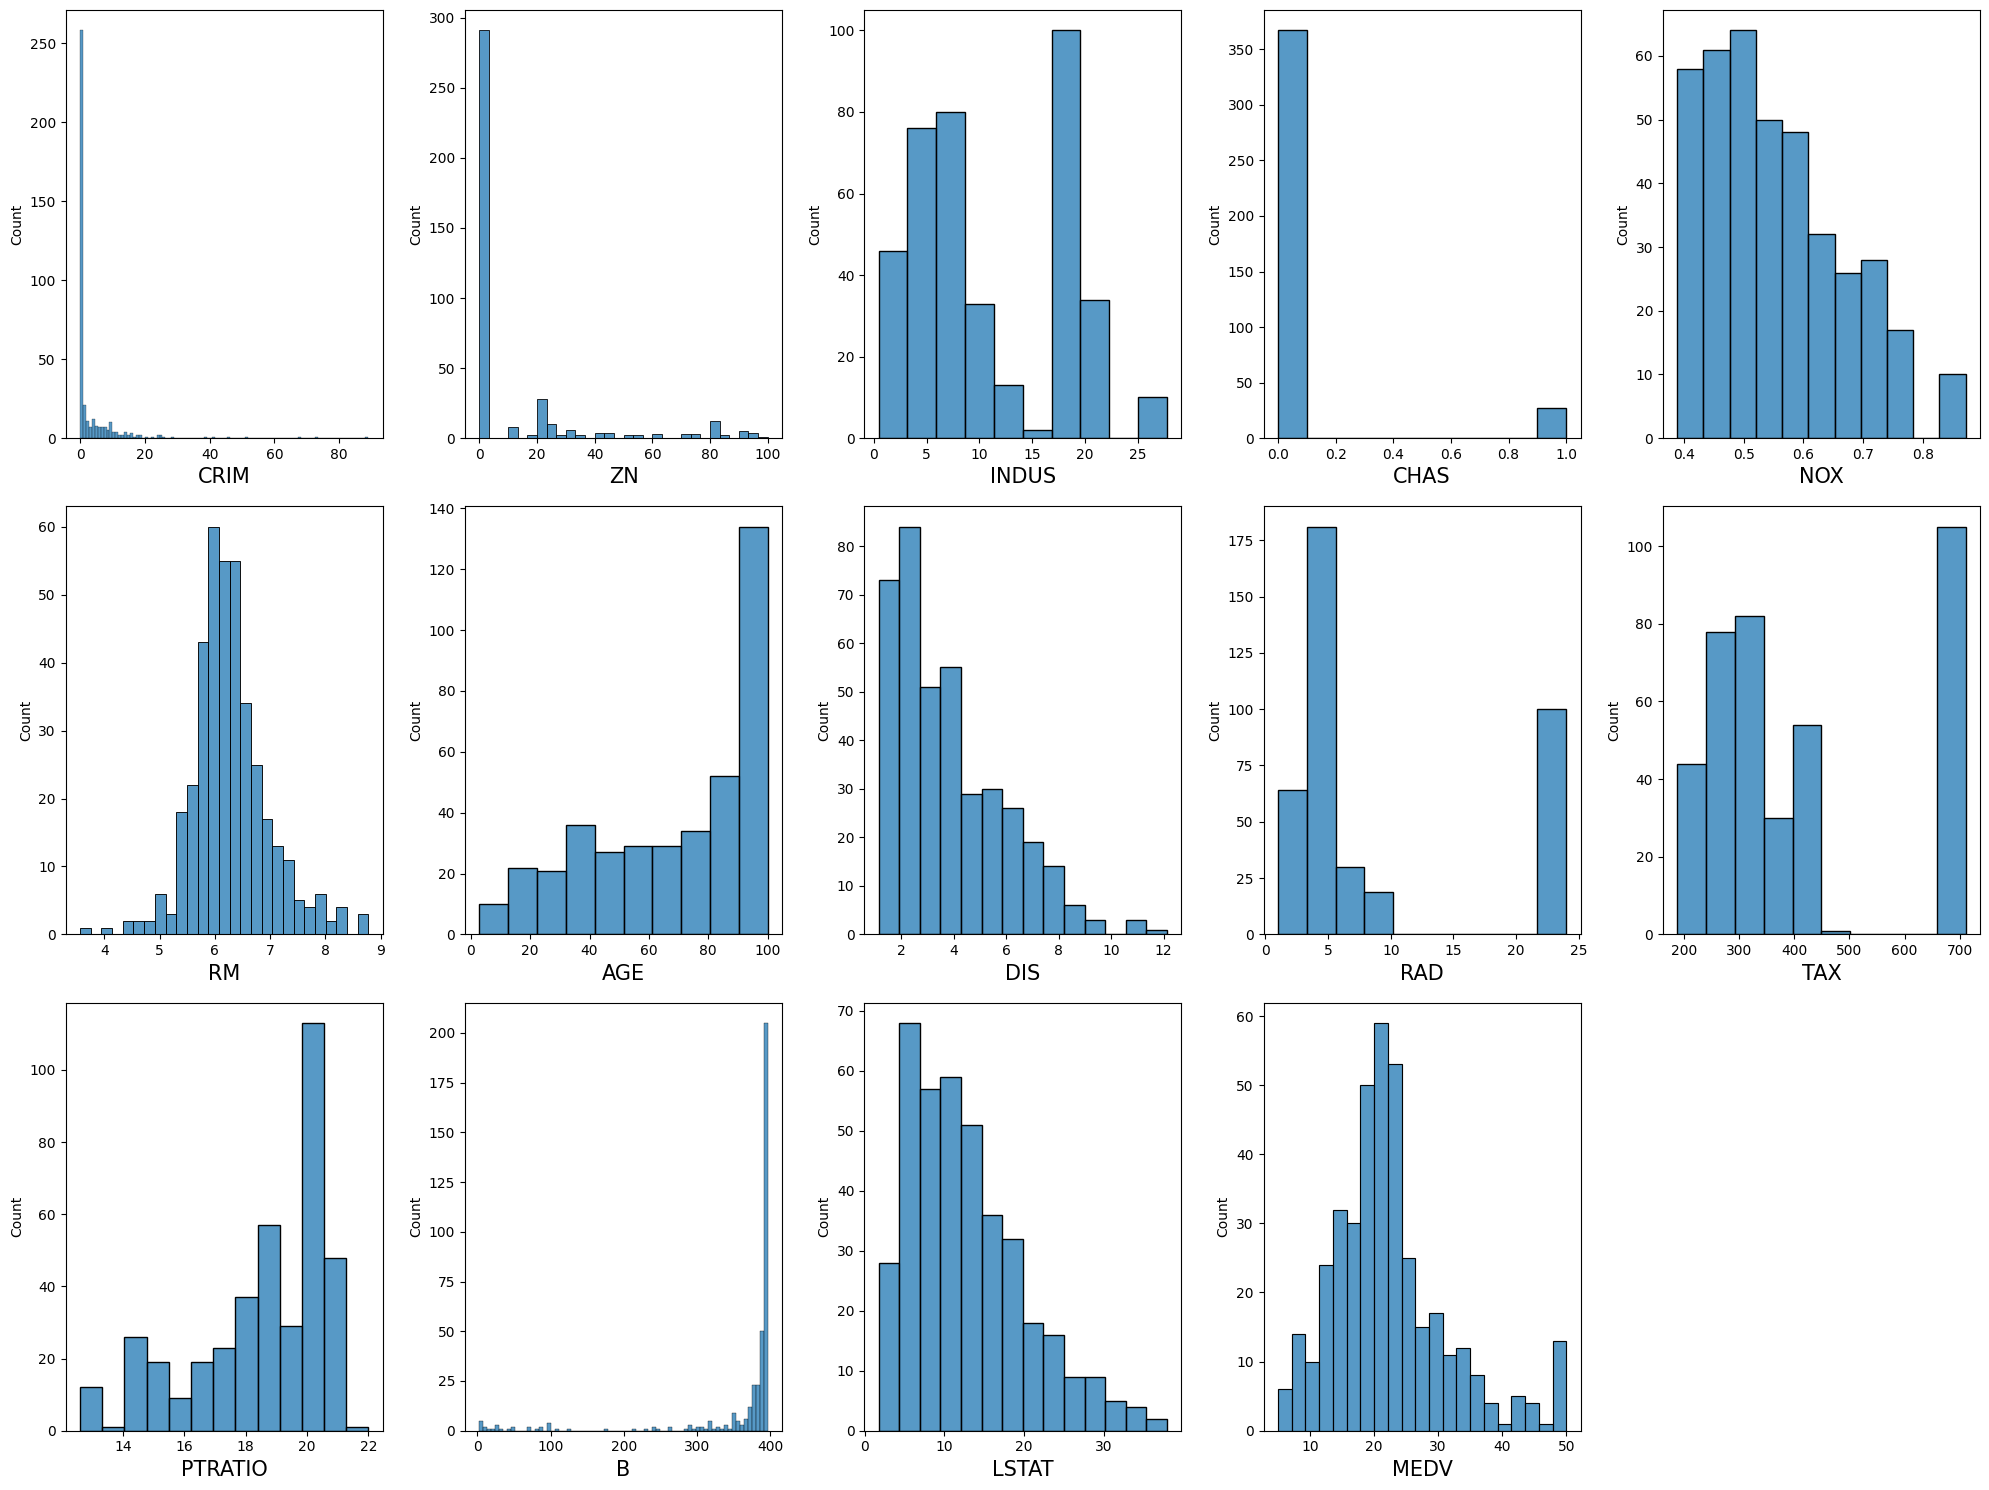

In [18]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Separating Input and Output Columns

In [19]:
X = df.drop(columns = ['MEDV'])
Y = df['MEDV']

### Splitting Test-Train Data

In [20]:
from sklearn.model_selection import train_test_split
 
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (315, 13)
xtest shape  :  (79, 13)
ytrain shape :  (315,)
ytest shape  :  (79,)


### Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print(xtrain.shape, "  ==  ", ytrain.shape)

(315, 13)   ==   (315,)


### Training Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
  
y_pred = reg.predict(xtest)

### Regression Model Prediction

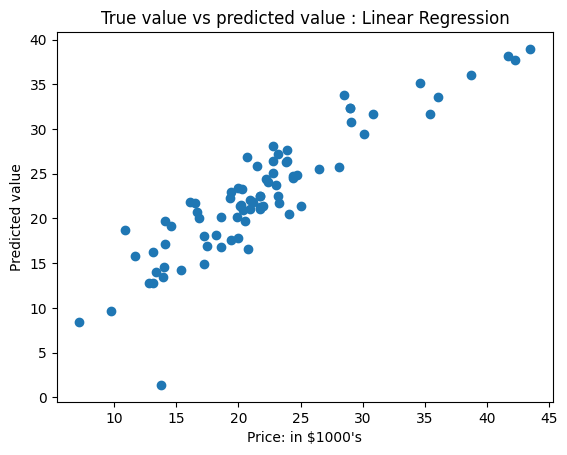

In [31]:
plt.scatter(ytest, y_pred)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

### Comparing Error 

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

MAE: 2.414215210029022
MSE: 10.248243793205365
RMSE: 3.201287833545332


In [25]:
# Print the intercept
print(f'Intercept: {reg.intercept_}\n')

# Print the coefficients
for feature, coef in zip(column_names, reg.coef_):
    print(f'{feature}: {coef}')

Intercept: 22.49809523809523

CRIM: -1.0101997272475511
ZN: 1.1116585117691762
INDUS: 0.38019040180193475
CHAS: 0.834052659757837
NOX: -2.3649704191991154
RM: 3.0593687507534684
AGE: -0.267311191035719
DIS: -3.064779024931641
RAD: 2.480010344503617
TAX: -2.1660673848543803
PTRATIO: -2.0445705201966264
B: 0.7062224826857372
LSTAT: -3.2609086643567964
